<a href="https://colab.research.google.com/github/mychen0/mychen0/blob/main/model_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tushare

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 18.7 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=526e531fcf865fe5d151e6b8c9f65fd03a57f8410eca7bf1a6009adb9510b691
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.5.1
    Uninstalling websocket-client-1.5.1:
      Successfully uninstalled websocket-client-1.5.1


In [7]:
import math
import pandas_datareader as web
import tushare as ts
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [100]:
## FIXME fu quan stock cannot get now from tushare
pro = ts.pro_api('e4f3511db451d0b55485284502844f6571ce59d1bef44b18607bf7db')
df = pro.daily(ts_code='688256.SH', start_date='20210101', end_date='20230508')
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,688256.SH,20230508,203.00,215.01,199.00,208.39,207.98,0.41,0.1971,108366.41,2259884.012
1,688256.SH,20230505,228.88,240.50,200.73,207.98,232.80,-24.82,-10.6615,196300.70,4256183.429
2,688256.SH,20230504,244.50,245.48,224.04,232.80,249.50,-16.70,-6.6934,117485.65,2751240.505
3,688256.SH,20230428,228.10,252.50,225.80,249.50,230.75,18.75,8.1257,146085.44,3537412.654
4,688256.SH,20230427,235.01,246.00,217.78,230.75,238.00,-7.25,-3.0462,138135.64,3175623.218
...,...,...,...,...,...,...,...,...,...,...,...
561,688256.SH,20210108,143.90,147.46,142.00,146.48,143.25,3.23,2.2548,6876.13,100091.948
562,688256.SH,20210107,149.78,149.98,141.51,143.25,150.10,-6.85,-4.5636,10810.15,156404.569
563,688256.SH,20210106,151.01,156.00,149.11,150.10,152.95,-2.85,-1.8634,10384.67,157656.611
564,688256.SH,20210105,146.88,154.49,146.44,152.95,147.58,5.37,3.6387,14799.82,224699.811


In [101]:
df.drop('ts_code', axis=1, inplace=True)
df.set_index('trade_date', inplace=True)
df = df.sort_index()

In [102]:
df['close']

trade_date
20210104    147.58
20210105    152.95
20210106    150.10
20210107    143.25
20210108    146.48
             ...  
20230427    230.75
20230428    249.50
20230504    232.80
20230505    207.98
20230508    208.39
Name: close, Length: 566, dtype: float64

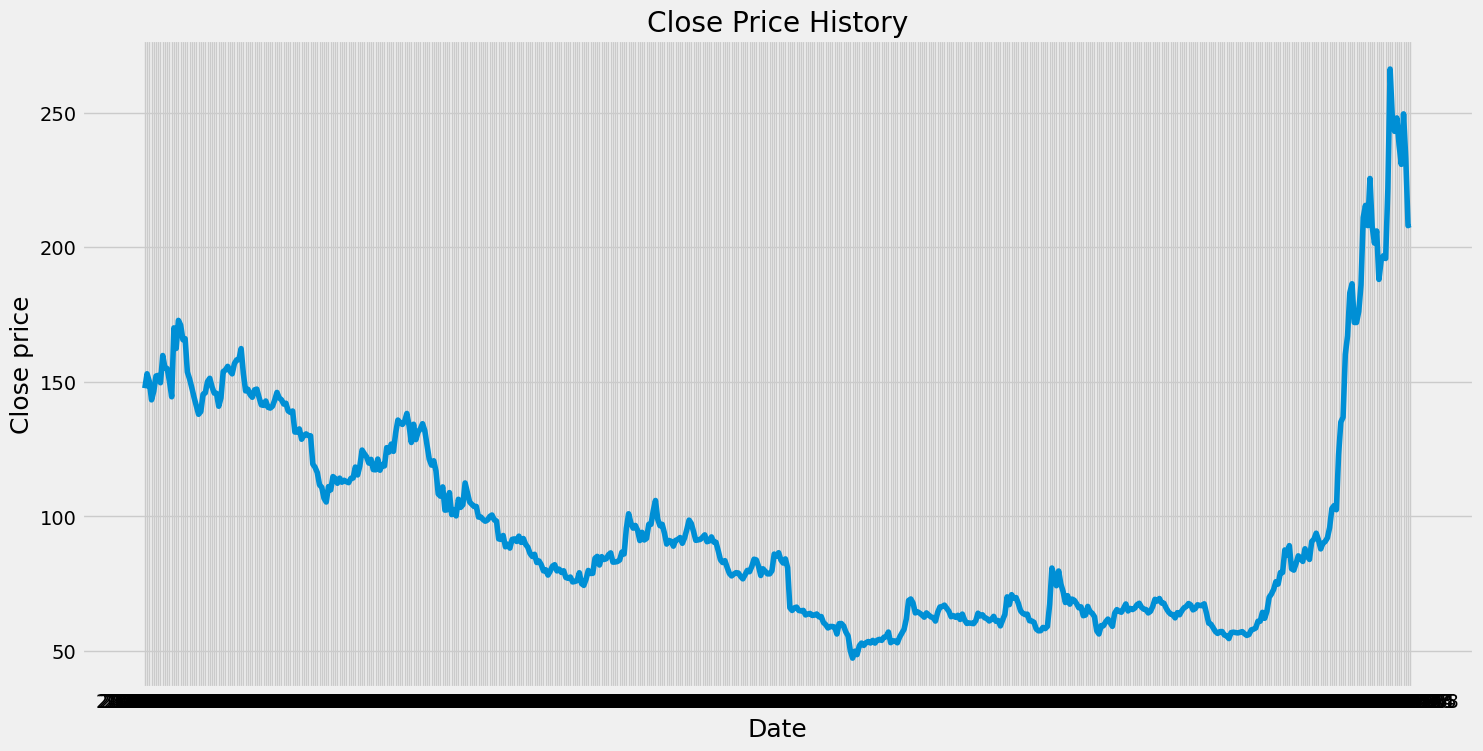

In [103]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8)

# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61:
      print(x_train)
      print(y_train)
      print()

In [113]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [116]:
# Reshape the data, because LSTM mdoel based on 3D [num_sample, num_time_steps, num_features]
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(393, 60, 1)

In [117]:
# build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [118]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [119]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

393/393 [==============================] - 18s 35ms/step - loss: 0.0019


In [120]:
# create the testing data set
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [121]:
x_test = np.array(x_test)

In [122]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [123]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 23ms/step


In [130]:
# get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( (predictions - y_test)**2) )
rmse

27.801539006992133

<ipython-input-134-f609c5171bf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


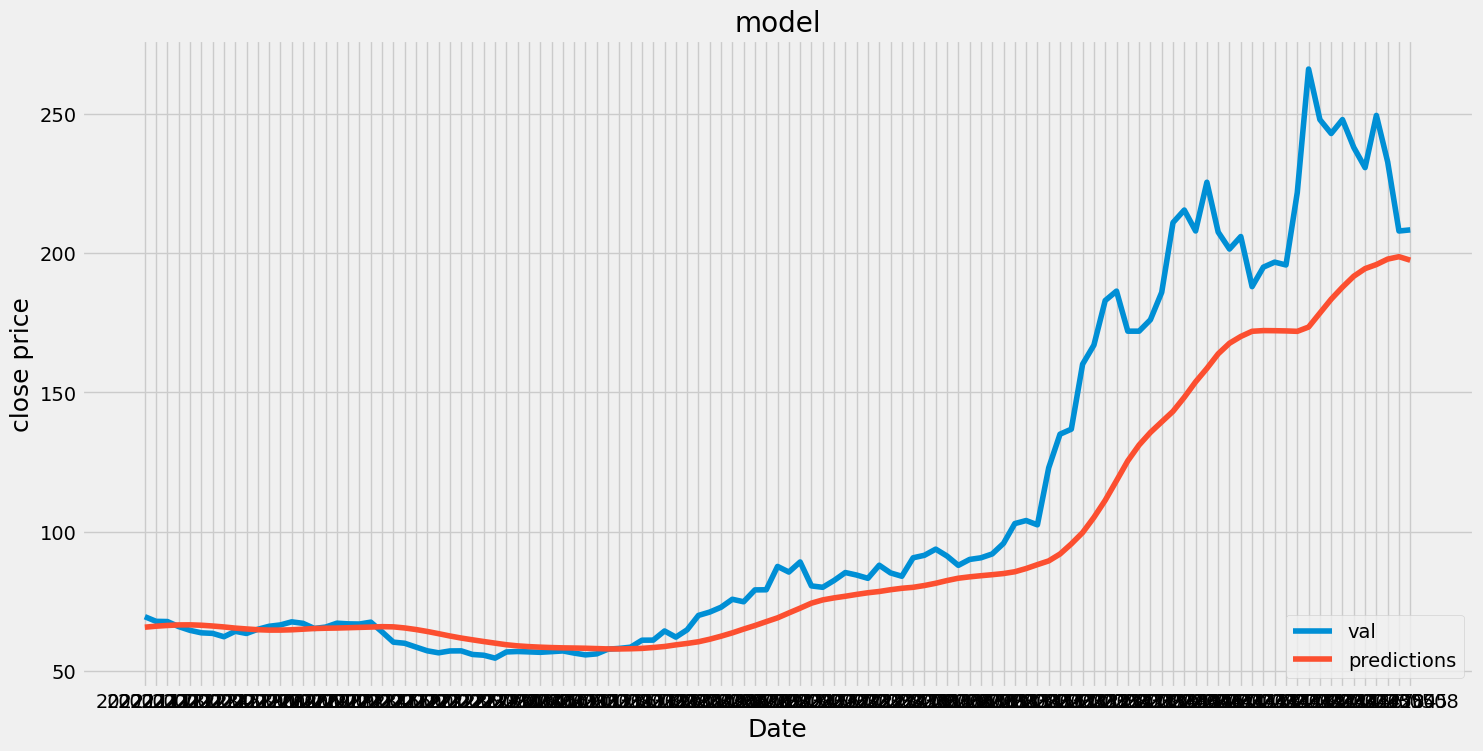

In [134]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price', fontsize=18)
#plt.plot(train['close'])
plt.plot(valid[['close','predictions']])
plt.legend(['val','predictions'], loc='lower right')
plt.show()

In [135]:
# show the valid and predicted prices
valid

,close,predictions
trade_date,,
20221117,69.45,65.669769
20221118,67.77,66.029236
20221121,67.70,66.296272
20221122,65.88,66.488930
20221123,64.54,66.516968
...,...,...
20230427,230.75,194.466812
20230428,249.50,195.930878
20230504,232.80,197.889633


In [ ]:
# get 